As we can see, this is a better way to see how correlated the stock returns are than through visulaization. By looking at the table we can easily spot which pairs of stock have the highest correlation. 

# TODO:

In the code below, make a scatter of equity `A` and equity `XOM`.

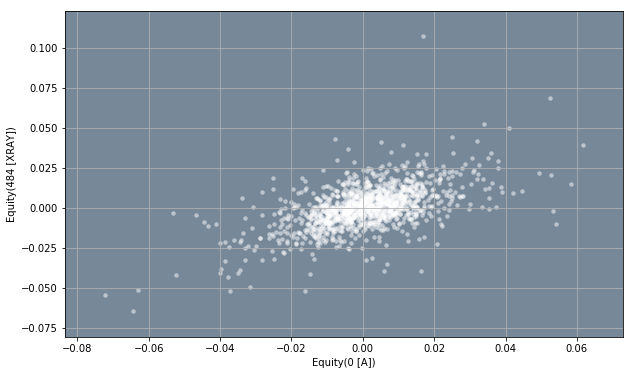

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt

# Set the default figure size
plt.rcParams['figure.figsize'] = [10.0, 6.0]

# # Make scatter plot
ax = returns.plot.scatter(x = 0, y = 483, grid = True, color = 'white', alpha = 0.5, linewidth = 0)
    
ax.set_facecolor('lightslategray')

# TODO:

In the code below, write a function `get_num_components(df, var_ret)` that takes a dataframe, `df`, and a value for the desired amount of variance you want to retain from the `df` dataframe,`var_ret`. In this case, the parameter `df` should be the `returns` dataframe obtained above. The parameter  `var_ret` must be anumber between 0 and 1. The function should return the number of principal components you need to retain that amount of variance. To do this, use Scikit-Learn's PCA() class and its `.explained_variance_ratio_`. The function should also print the total amount of variance retained. 

In [6]:
# import resources
from sklearn.decomposition import PCA


def get_num_components(df, var_ret):
    
    if var_ret > 1 or var_ret < 0:
        print('Error')
        return 0
    
    if var_ret == 1:
        return df.shape[1]
        
    pca = PCA(n_components = df.shape[1])

    pca.fit(df)
    
    needed_components = 0
    
    var_sum = 0
    
    for i in range(0, df.shape[1]):

        if var_sum >= var_ret:
            print('Total Variance Retained: ', pca.explained_variance_ratio_[0:needed_components].sum())
            return needed_components
        else:
            needed_components += 1            
            var_sum += pca.explained_variance_ratio_[i]
            
num_components = get_num_components(returns, 0.9)

print('\nNumber of Principal Components Needed: ', num_components)

Total Variance Retained:  0.900236862496

Number of Principal Components Needed:  179


# TODO:

In the previous section you calculated the number of principal compenents needed to retain a given amount of variance. As you might notice you can greatly reduce the dimensions of the data even if you retain a high level of variance (`var_ret` > 0.9). In the code below, use the number of components needed calculated in the last section, `num_components` to calculate by the percentage of dimensionality reduction. For example, if the original data was 100-dimensional, and the amount of components needed to retian a certain amount of variance is 70, then we are able to reduce the data by 30%. 

In [7]:
# Calculate the percentage of dimensionality reduction
red_per = ((returns.shape[1] - num_components) / returns.shape[1]) * 100

print('We were able to reduce the dimenionality of the data by:', red_per, 'percent')

We were able to reduce the dimenionality of the data by: 63.469387755102034 percent
